# How Markets Really Work: Short-term Highs And Short-term Lows

Import packages

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pickle

## Load Data 

List of files to load

In [4]:
input_filename = ['spx.pickle', 'ndx.pickle']

Create a list to load DataFrame objects

In [5]:
data_list = [pd.DataFrame(), pd.DataFrame()]

Pickle DataFrame objects

In [6]:
for i in range(len(input_filename)):
    with open(input_filename[i], 'rb') as f:
        data_list[i] = pickle.load(f)
        
    f.close()

Create a single DataFrame object containing both SPX and NDX data

In [7]:
data = pd.concat(data_list, axis=1)

Set indices

In [8]:
data.columns = pd.MultiIndex.from_product([['spx', 'ndx'], data_list[0].columns])

Inspect data

In [9]:
data.head()

spx                                                     ndx  \
                 Open       High        Low      Close  Adj Close Volume Open   
Date                                                                            
1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000      0  NaN   
1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000      0  NaN   
1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999      0  NaN   
1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999      0  NaN   
1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000      0  NaN   

                                            
           High Low Close Adj Close Volume  
Date                                        
1927-12-30  NaN NaN   NaN       NaN    NaN  
1928-01-03  NaN NaN   NaN       NaN    NaN  
1928-01-04  NaN NaN   NaN       NaN    NaN  
1928-01-05  NaN NaN   NaN       NaN    NaN  
1928-01-06  NaN NaN   NaN       NaN    NaN

In [10]:
data.tail()

spx                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2019-11-29  3147.179932  3150.300049  3139.340088  3140.979980  3140.979980   
2019-12-02  3143.850098  3144.310059  3110.780029  3113.870117  3113.870117   
2019-12-03  3087.409912  3094.969971  3070.330078  3093.199951  3093.199951   
2019-12-04  3103.500000  3119.379883  3102.530029  3112.760010  3112.760010   
2019-12-05  3119.209961  3119.429932  3103.760010  3111.090088  3111.090088   

                                ndx                                         \
                Volume         Open         High          Low        Close   
Date                                                                         
2019-11-29  1743020000  8682.009766  8697.320313  8664.040039  8665.469727   
2019-12-02  3268740000  8672.839844  8672.839844  8540.160156  8567.990234   
2019-12-03  3653390000  8460.719727  8523.980469  8435.400391  8520.639648   
2019-12-04  3695030000  8557.450195  8584.879883  8552.379883  8566.669922   
2019-12-05   467114990  8587.933594  8588.885742  8541.917969  8563.492188   

                                       
              Adj Close        Volume  
Date                                   
2019-11-29  8665.469727  1.099090e+09  
2019-12-02  8567.990234  2.225940e+09  
2019-12-03  8520.639648  2.308600e+09  
2019-12-04  8566.669922  2.150680e+09  
2019-12-05  8563.492188  6.831895e+08

In [11]:
data.describe()

spx                                                          \
               Open          High           Low         Close     Adj Close   
count  23092.000000  23092.000000  23092.000000  23092.000000  23092.000000   
mean     460.240768    462.893373    457.425962    460.339423    460.339423   
std      678.633011    682.061542    674.903514    678.737189    678.737189   
min        4.400000      4.400000      4.400000      4.400000      4.400000   
25%       23.670000     23.670000     23.670000     23.670000     23.670000   
50%       98.774998     99.575001     97.970001     98.765000     98.765000   
75%      745.264984    750.557525    740.809998    746.050003    746.050003   
max     3147.179932   3154.260010   3143.409912   3153.629883   3153.629883   

                              ndx                                            \
             Volume          Open          High           Low         Close   
count  2.309200e+04  12318.000000  12318.000000  12318.000000  12318.000000   
mean   7.282778e+08   1711.577941   1722.325066   1699.062016   1711.365630   
std    1.427891e+09   1930.685910   1941.688048   1917.763206   1930.523938   
min    0.000000e+00     54.869999     54.869999     54.869999     54.869999   
25%    1.220000e+06    241.817493    242.854996    241.519993    242.439995   
50%    1.660500e+07    919.559998    924.935028    915.955017    921.305023   
75%    4.647950e+08   2430.750000   2451.670044   2410.342468   2431.137451   
max    1.145623e+10   8682.009766   8705.910156   8664.040039   8705.179688   

                                   
          Adj Close        Volume  
count  12318.000000  1.231800e+04  
mean    1711.365630  8.884290e+08  
std     1930.523938  9.216810e+08  
min       54.869999  0.000000e+00  
25%      242.439995  0.000000e+00  
50%      921.305023  3.821950e+08  
75%     2431.137451  1.797655e+09  
max     8705.179688  4.553600e+09

## The Market Has Declined (On Average) Following 5-day And 10-day Highs

Set period from January 1, 1989 to October 1, 2011

In [12]:
start = '1989-01-01'
end = '2011-10-01'

SPX adjusted close prices

In [13]:
spx_close = data.spx['Adj Close'][start:end]

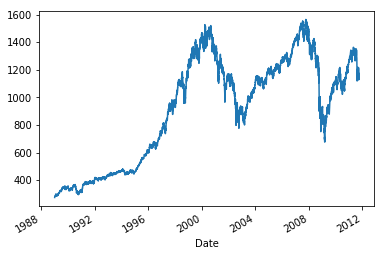

In [14]:
spx_close.plot()

Daily returns

In [15]:
spx_daily_returns = spx_close.pct_change()

Average daily returns

In [16]:
spx_daily_returns.mean()

0.0003144087138078696

Weekly returns

In [17]:
spx_weekly_returns = spx_close.pct_change(periods=5)

Average weekly returns

In [18]:
spx_weekly_returns.mean()

0.0015302776545769482